# Analyzing Factors Influencing Airbnb Guest Satisfaction: A Comparative Study of NYC and LA


In this analysis, I will explore factors influencing guest review scores for Airbnb properties in NYC and LA. I will perform data cleaning, exploratory data analysis (EDA), and linear regression to try and uncover relationships between key metrics and guest satisfaction. This analysis aims to provide insights for hosts and potential investors, with actionable takeaways to improve guest experiences.

In [3]:
# Data Manipulation
import pandas as pd
import numpy as np
import ast

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import folium
from folium.plugins import HeatMap

# Statistical Analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew, kurtosis

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Display
from IPython.display import FileLink, display

In [4]:
#Reading in dataset
df = pd.read_csv('Airbnb_Prices.csv')
df.columns = df.columns.str.strip()
df.rename(columns={'neighbourhood': 'neighborhood'}, inplace=True)


In [1]:
import os
print(os.getcwd())

/Users/chadmcveigh


In [5]:
# Display initial information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  description             74111 non-null  object 
 11  first_review            58247 non-null  object 
 12  host_has_profile_pic    73923 non-null  object 
 13  host_identity_verified  73923 non-null  object 
 14  host_response_rate      55812 non-null

In [6]:
df.head(10)

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighborhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,150.0
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,145.0
3,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,750.0
4,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,115.0
5,12422935,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,...,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
6,11825529,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,LA,...,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0,83.0
7,13971273,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,LA,...,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0,120.0
8,180792,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,...,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,120.0
9,5385260,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,LA,...,-117.895997,No.7 Queen Size Cozy Room 舒适大床房,NaN,2,90.0,https://a0.muscache.com/im/pictures/8d2f08ce-b...,91748,1.0,1.0,36.0


In [7]:
df.describe()

,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,price
count,7.411100e+04,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868,160.370849
std,6.081735e+06,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142,168.580415
min,3.440000e+02,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000,1.000000
25%,6.261964e+06,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000,75.000000
50%,1.225415e+07,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000,111.000000
75%,1.640226e+07,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000,185.000000
max,2.123090e+07,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000,1999.000001


In [8]:
df.isnull().sum()

id                            0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighborhood               6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
price                         0
dtype: int64

To ensure a robust comparison of factors influencing pricing between cities, rows without review scores are excluded from the analysis. This omission addresses data quality by removing entries that lack customer feedback, either due to the absence of reviews or failure to capture this data. null bedrooms, bathrooms, and beds are also ommitted to address data quality concerns.

In [10]:
# Dropping rows that don't have critical data
df = df.dropna(subset=['review_scores_rating', 'bedrooms', 'beds', 'accommodates', 'property_type', 'neighborhood'])

#Dropping duplicates
df = df.drop_duplicates()

# Remove the '%' sign and convert to float
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)

# Now convert the series to represent the actual percentages
df['host_response_rate'] = df['host_response_rate'] / 100.0

# Check the conversion
print(df['host_response_rate'].head())

0    NaN
1    1.0
2    1.0
4    1.0
5    1.0
Name: host_response_rate, dtype: float64


Outliers can significantly skew the results of statistical analyses, particularly in regression models. To ensure a robust analysis, we will detect and handle outliers in the price column before proceeding.

Skewness of price: 4.242527646416307
Kurtosis of price: 30.398168144337887


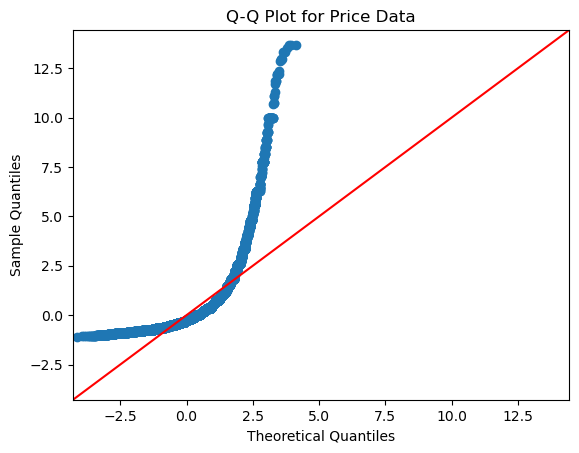

In [12]:
price_skewness = skew(df['price'])
price_kurtosis = kurtosis(df['price'])

print(f"Skewness of price: {price_skewness}")
print(f"Kurtosis of price: {price_kurtosis}")

sm.qqplot(df['price'], line ='45', fit=True)
plt.title('Q-Q Plot for Price Data')
plt.show()

## Why Normalize the Price Data?
Initial analysis of the dataset reveals a highly skewed distribution of prices, with a significant concentration of data at lower price points and long tails extending into higher price ranges. This skewness is quantitatively supported by a skewness metric of 4.61 and a kurtosis of 35.21, indicating substantial tail weight and deviation from a normal distribution. Such characteristics necessitate the normalization of the price variable. Applying a logarithmic transformation will help mitigate these issues by compressing the scale of price data, thus reducing skewness and stabilizing variance across the dataset. This transformation is crucial not only for revealing more discernible patterns across the entire price range but also for enhancing the performance and interpretability of predictive models, which often assume normally distributed input data. The normalization will thus help in achieving more reliable analytical insights and model predictions.

Skewness of log_price: 0.2019045849005251
Kurtosis of log_price: -0.2540543007089391


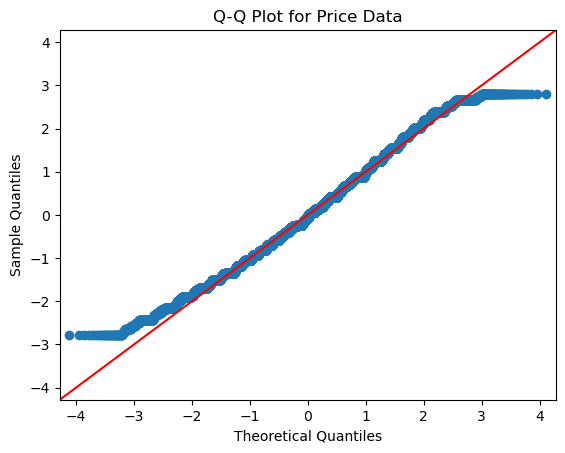

In [14]:
#Normalizing price data
df['log_price'] = np.log1p(df['price'])

# Calculate IQR
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['log_price'] >= lower_bound) & (df['log_price'] <= upper_bound)]

#Recalculating skewness/kurtosis and replotting Q-Q
log_price_skewness = skew(df['log_price'])
log_price_kurtosis = kurtosis(df['log_price'])

print(f"Skewness of log_price: {log_price_skewness}")
print(f"Kurtosis of log_price: {log_price_kurtosis}")

sm.qqplot(df['log_price'], line ='45', fit=True)
plt.title('Q-Q Plot for Price Data')
plt.show()


# Exploratory Data Analysis

With the data now cleaned and prepped—through price normalization, outlier handling, and addressing missing/duplicate values—we are ready to explore key patterns and relationships that will inform my predictive models. My focus will be on comparing the top two cities based on available data, while examining how factors like host response rate influence review scores.

In [17]:
#Finding top two cities to compare based on data volume
city_counts = df['city'].value_counts()

# Display the top 2 cities with the most listings
top_two_cities = city_counts.head(2)
print(top_two_cities)

city
NYC    24742
LA     12981
Name: count, dtype: int64


In [18]:
#Analyzing only LA vs NY
df = df[df['city'].isin(['LA', 'NYC'])]

df.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,name,neighborhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price,log_price
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,150.0,5.017280
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0,5.135798
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,145.0,4.983607
7,13971273,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,LA,...,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0,120.0,4.795791
10,5578513,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,NYC,...,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009,1.0,1.0,100.0,4.615121


In [19]:
# Viewing summary statistics of columns I will use for my analysis
# Separate data for LA and NYC
df_la = df[df['city'] == 'LA']
df_nyc = df[df['city'] == 'NYC']

# Create summary statistics for both cities
summary_la = df_la[['price', 'beds', 'bathrooms', 'accommodates', 'review_scores_rating', 'number_of_reviews', 'host_response_rate']].describe().add_prefix('LA_')
summary_nyc = df_nyc[['price', 'beds', 'bathrooms', 'accommodates', 'review_scores_rating', 'number_of_reviews', 'host_response_rate']].describe().add_prefix('NYC_')

# Concatenate side by side
summary_comparison = pd.concat([summary_la, summary_nyc], axis=1)

summary_comparison

,LA_price,LA_beds,LA_bathrooms,LA_accommodates,LA_review_scores_rating,LA_number_of_reviews,LA_host_response_rate,NYC_price,NYC_beds,NYC_bathrooms,NYC_accommodates,NYC_review_scores_rating,NYC_number_of_reviews,NYC_host_response_rate
count,12981.000000,12981.000000,12944.000000,12981.000000,12981.000000,12981.000000,11481.000000,24742.000000,24742.000000,24669.000000,24742.000000,24742.000000,24742.000000,19262.000000
mean,137.286496,1.833295,1.293765,3.409368,94.445959,30.187043,0.958775,132.526392,1.575701,1.118914,2.869493,93.509417,23.451823,0.946292
std,99.992241,1.337939,0.612346,2.211551,7.430693,43.773151,0.127973,91.125777,1.048898,0.370813,1.786462,8.160017,35.792206,0.147624
min,20.000000,1.000000,0.000000,1.000000,20.000000,1.000000,0.000000,20.000000,1.000000,0.000000,1.000000,20.000000,1.000000,0.000000
25%,75.000000,1.000000,1.000000,2.000000,92.000000,4.000000,1.000000,70.000000,1.000000,1.000000,2.000000,91.000000,3.000000,1.000000
50%,105.000000,1.000000,1.000000,3.000000,97.000000,13.000000,1.000000,105.000000,1.000000,1.000000,2.000000,96.000000,9.000000,1.000000
75%,165.000000,2.000000,1.500000,4.000000,100.000000,37.000000,1.000000,169.000000,2.000000,1.000000,4.000000,100.000000,28.000000,1.000000
max,651.000000,16.000000,8.000000,16.000000,100.000000,532.000000,1.000000,650.000000,16.000000,8.000000,16.000000,100.000000,474.000000,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


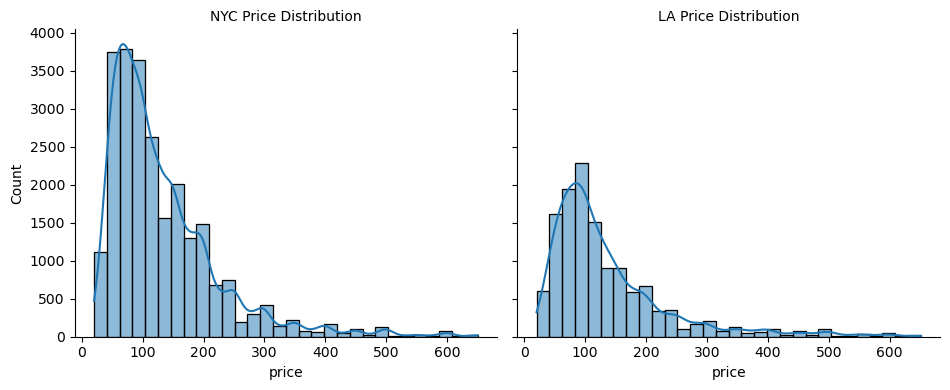

In [20]:
# Facet grid to compare price between LA and NYC
g = sns.FacetGrid(df, col='city', height=4, aspect=1.2)
g.map(sns.histplot, 'price', bins=30, kde=True)
g.set_titles("{col_name} Price Distribution")
plt.show()

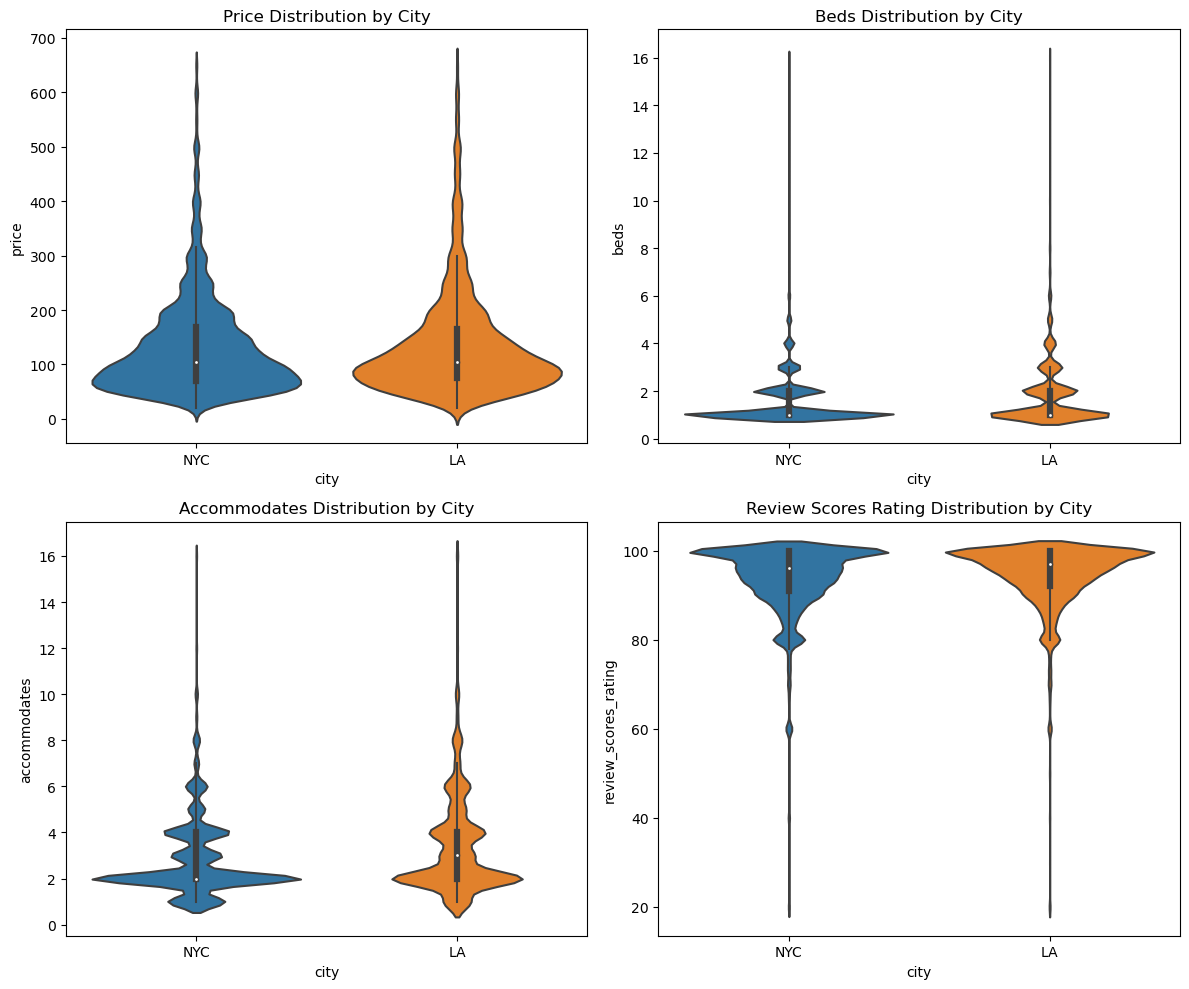

In [21]:
# Violin plots for data comparison between LA and NYC
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Price Distribution
sns.violinplot(x='city', y='price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution by City')

# Beds Distribution
sns.violinplot(x='city', y='beds', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Beds Distribution by City')

# Accommodates Distribution
sns.violinplot(x='city', y='accommodates', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Accommodates Distribution by City')

# Review Scores Rating Distribution
sns.violinplot(x='city', y='review_scores_rating', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Review Scores Rating Distribution by City')

plt.tight_layout()
plt.show()

From my brief EDA, we can see that LA and NY exhibit similar trends in key metrics. NYC has a slightly higher concentration of more expensive listings, with the majority of properties in both cities having 1-2 beds, and accommodating 2-4 people.

Next, I will be exploring how the host's response rate affects review scores. I will be creating bins to see if different responsiveness impacts how customers rate their airbnb's. 

## Comparisons

In [24]:
bins = [0, 0.5, 0.8, 0.99, 1]
labels = ['0-50%', '51-80%', '81-99%', '100%']
df['response_rate_category'] = pd.cut(df['host_response_rate'], bins=bins, labels=labels, include_lowest=True)

review_scores_by_city_response = df.groupby(['city', 'response_rate_category'])['review_scores_rating'].mean()
print(review_scores_by_city_response)

city  response_rate_category
LA    0-50%                     91.941423
      51-80%                    92.461806
      81-99%                    92.213372
      100%                      95.176615
NYC   0-50%                     91.995146
      51-80%                    92.400709
      81-99%                    92.204989
      100%                      94.120434
Name: review_scores_rating, dtype: float64


/var/folders/nv/hytlqwxj17z59wcx9q34y4zm0000gn/T/ipykernel_21660/3831916147.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_scores_by_city_response = df.groupby(['city', 'response_rate_category'])['review_scores_rating'].mean()


/var/folders/nv/hytlqwxj17z59wcx9q34y4zm0000gn/T/ipykernel_21660/137329104.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='response_rate_category', y='review_scores_rating', hue='city', data=df, ci="sd")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


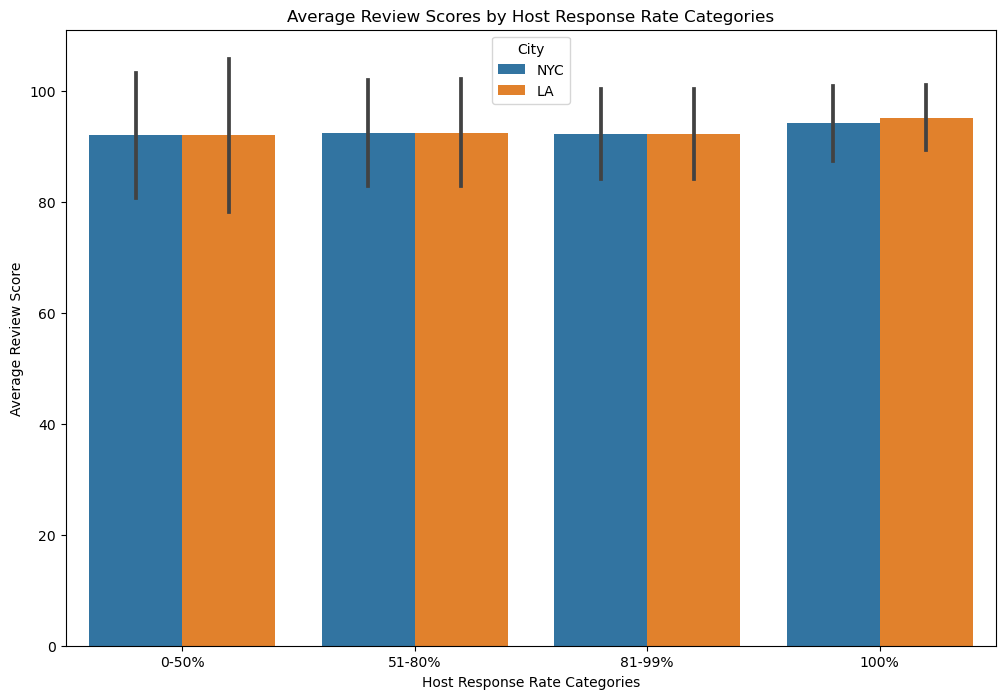

In [25]:

plt.figure(figsize=(12, 8))
sns.barplot(x='response_rate_category', y='review_scores_rating', hue='city', data=df, ci="sd")
plt.title('Average Review Scores by Host Response Rate Categories')
plt.xlabel('Host Response Rate Categories')
plt.ylabel('Average Review Score')
plt.legend(title='City')
plt.show()

The distribution graph reveals that the majority of listings fall within the 81-100% host response rate categories. Within these groups, the spread of review scores is greater, indicating that while response rates may contribute to a positive experience, guests are more concerned with other aspects of their stay (such as the property’s quality, location, or amenities).

For the remainder of the analysis, I will dive deeper into these potential factors by performing a multiple linear regression analysis, focusing on the top 10 neighborhoods and top 5 property types in both LA and NYC to narrow the scope of my analysis and ensure robust comparisons. This will allow us to see how various attributes, beyond host responsiveness, contribute to pricing and guest satisfaction.

In [27]:
top_property_types = df['property_type'].value_counts().head(5).index
print("Top 5 Property Types:", top_property_types)

Top 5 Property Types: Index(['Apartment', 'House', 'Townhouse', 'Loft', 'Condominium'], dtype='object', name='property_type')


In [28]:
print(df['property_type'].isnull().sum())
print(df['property_type'].unique())
print(df['property_type'].dtype)


0
['Apartment' 'Condominium' 'House' 'Loft' 'Hostel' 'Guest suite'
 'Bed & Breakfast' 'Bungalow' 'Townhouse' 'Other' 'Guesthouse' 'Dorm'
 'Villa' 'Timeshare' 'Serviced apartment' 'Camper/RV' 'Boutique hotel'
 'Cabin' 'Treehouse' 'Tipi' 'Hut' 'Boat' 'Vacation home' 'Tent' 'In-law'
 'Castle' 'Chalet' 'Yurt' 'Earth House' 'Cave']
object


In [29]:
# Filter the DataFrame to include only the top 5 property types
df = df[df['property_type'].isin(top_property_types)]
df['property_type'] = df['property_type'].astype(str)

df = df.dropna(subset=['host_response_rate'])

/var/folders/nv/hytlqwxj17z59wcx9q34y4zm0000gn/T/ipykernel_21660/3788313828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['property_type'] = df['property_type'].astype(str)


### Focusing on the Top 10 Neighborhoods

In this analysis, I have decided to focus on the top 10 neighborhoods from both LA and NYC. These neighborhoods were chosen based on the highest number of listings in the dataset, providing a more representative sample for comparison. By narrowing down to the top neighborhoods, I aim to ensure a more balanced and detailed analysis across both cities while reducing the potential noise that might be introduced by areas with fewer listings.

This approach will help us derive more meaningful insights about how different factors, such as property type, accommodates, and host responsiveness, affect review scores within the busiest areas of each city. Limiting the analysis to the top neighborhoods also makes it computationally efficient while retaining the robustness of the dataset.

In [31]:
# Group by city and zip_code to find top 10 zip codes in each city
top_zip_codes_by_city = df.groupby(['city', 'zipcode']).size().reset_index(name='count')
top_zip_codes_by_city = top_zip_codes_by_city.sort_values(by='count', ascending=False).groupby('city').head(5)

# Display the top 10 zip codes for each city
print("Top 10 Zip Codes for each City:")
print(top_zip_codes_by_city)

# Group by city and neighborhood to find top 10 neighborhoods in each city
top_neighborhoods_by_city = df.groupby(['city', 'neighborhood']).size().reset_index(name='count')
top_neighborhoods_by_city = top_neighborhoods_by_city.sort_values(by='count', ascending=False).groupby('city').head(5)

# Display the top 10 neighborhoods for each city
print("\nTop 10 Neighborhoods for each City:")
print(top_neighborhoods_by_city)

# Compare total listings in top 10 zip codes and neighborhoods for each city
zip_code_totals = top_zip_codes_by_city.groupby('city')['count'].sum()
neighborhood_totals = top_neighborhoods_by_city.groupby('city')['count'].sum()

print("\nTotal listings in top 10 Zip Codes:")
print(zip_code_totals)

print("\nTotal listings in top 10 Neighborhoods:")
print(neighborhood_totals)

Top 10 Zip Codes for each City:
    city zipcode  count
346  NYC   11211    923
94    LA   90291    775
356  NYC   11221    768
341  NYC   11206    574
351  NYC   11216    574
241  NYC   10002    572
45    LA   90046    510
26    LA   90028    444
24    LA   90026    397
33    LA   90036    323

Top 10 Neighborhoods for each City:
    city        neighborhood  count
336  NYC        Williamsburg   1643
160  NYC  Bedford-Stuyvesant   1413
172  NYC            Bushwick    923
53    LA           Hollywood    892
233  NYC      Hell's Kitchen    870
76    LA        Mid-Wilshire    862
232  NYC              Harlem    855
132   LA              Venice    824
138   LA      West Hollywood    482
107   LA        Santa Monica    374

Total listings in top 10 Zip Codes:
city
LA     2449
NYC    3411
Name: count, dtype: int64

Total listings in top 10 Neighborhoods:
city
LA     3434
NYC    5704
Name: count, dtype: int64


In [32]:
# Filtering dataframe to top 5 neigbhorhoods in each city
df = df[df['neighborhood'].isin(top_neighborhoods_by_city['neighborhood'])]

### Calculating IVF and Regression

I will now check for multicolinearity through calculating the IVF, and then will perform a multiple regression analysis on my independent variables to see which factors influence customers review score the most.

In [34]:
# Dependent variable
y = df['review_scores_rating']

def calculate_vif(data, city_name):
    df = data[data['city'] == city_name]
    property_dummies = pd.get_dummies(df['property_type'], drop_first=True, dtype='int')
    neighborhood_dummies = pd.get_dummies(df['neighborhood'], drop_first=True, dtype='int')
    
    X = pd.concat([df[['accommodates', 'price', 'host_response_rate']], property_dummies, neighborhood_dummies], axis=1)
    
    X = sm.add_constant(X)

    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print(f"Variance Inflation Factors (VIF) for {city_name}:")
    print(vif)

calculate_vif(df, 'NYC')
calculate_vif(df, 'LA')



Variance Inflation Factors (VIF) for NYC:
              Variable        VIF
0                const  46.446048
1         accommodates   1.820659
2                price   2.149846
3   host_response_rate   1.007628
4          Condominium   1.013839
5                House   1.068684
6                 Loft   1.043813
7            Townhouse   1.030867
8             Bushwick   1.411282
9               Harlem   1.412372
10      Hell's Kitchen   1.758008
11        Williamsburg   1.778617
Variance Inflation Factors (VIF) for LA:
              Variable        VIF
0                const  67.724466
1         accommodates   1.814554
2                price   2.024255
3   host_response_rate   1.006331
4          Condominium   1.033595
5                House   1.140871
6                 Loft   1.023354
7            Townhouse   1.025159
8         Mid-Wilshire   1.512256
9         Santa Monica   1.337386
10              Venice   1.667363
11      West Hollywood   1.365821


Most of my variables have VIF values below 2, indicating that multicollinearity is not an issue. We will now continue with the regression analysis. 

In [36]:
def run_regression(data, city_name):
    df = data[data['city'] == city_name]
    property_dummies = pd.get_dummies(df['property_type'], drop_first=True, dtype='int')
    neighborhood_dummies = pd.get_dummies(df['neighborhood'], drop_first=True, dtype='int')

    # Combine all independent variables
    X = pd.concat([df[['accommodates', 'price', 'host_response_rate']], property_dummies, neighborhood_dummies], axis=1)
    X = sm.add_constant(X)

    # Dependent variable
    y = df['review_scores_rating']

    # Fit the model
    model = sm.OLS(y, X).fit()

    return model

# Run regressions for NYC and LA
model_nyc = run_regression(df, 'NYC')
model_la = run_regression(df, 'LA')

print("NYC Regression Results:")
print(model_nyc.summary())

print("\nLA Regression Results:")
print(model_la.summary())

NYC Regression Results:
                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.035
Model:                              OLS   Adj. R-squared:                  0.033
Method:                   Least Squares   F-statistic:                     18.92
Date:                  Wed, 18 Sep 2024   Prob (F-statistic):           8.35e-38
Time:                          00:19:11   Log-Likelihood:                -19418.
No. Observations:                  5704   AIC:                         3.886e+04
Df Residuals:                      5692   BIC:                         3.894e+04
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

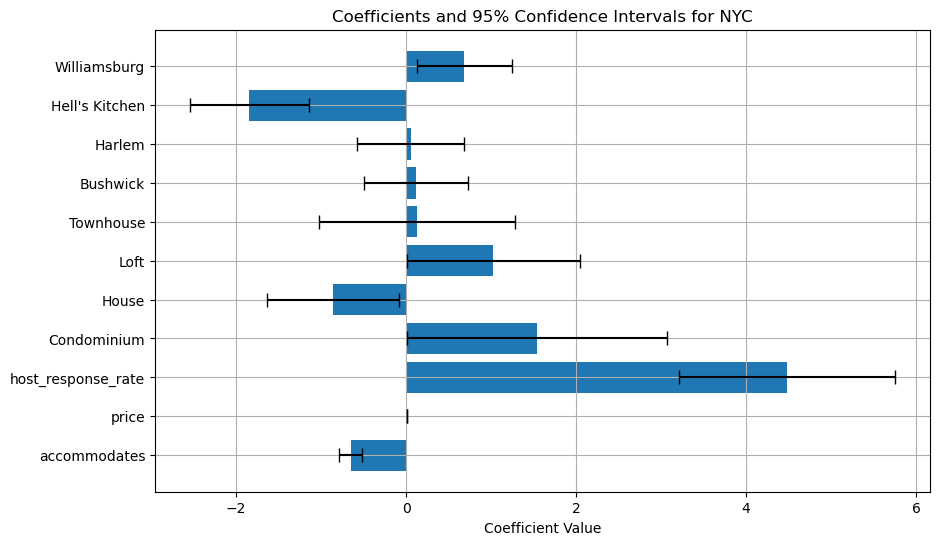

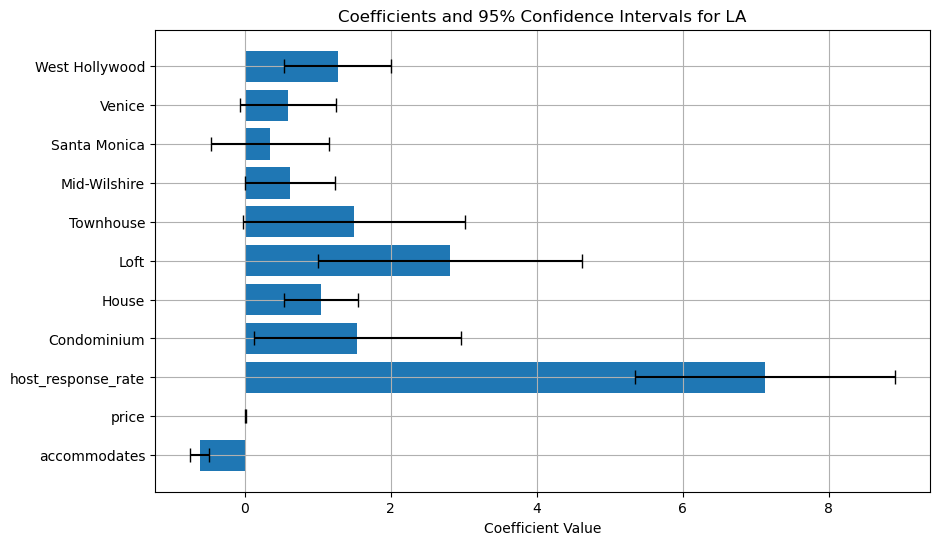

In [37]:
def plot_coefficients(model, city_name):
    # Extract the coefficients and confidence intervals
    coefficients = model.params
    conf_intervals = model.conf_int()
    
    # Filter out the constant term
    coefficients = coefficients.drop('const')
    conf_intervals = conf_intervals.loc[coefficients.index]
    
    # Create a bar plot for the coefficients with error bars representing the confidence intervals
    plt.figure(figsize=(10, 6))
    plt.barh(coefficients.index, coefficients.values, xerr=[(coefficients - conf_intervals[0]).values, (conf_intervals[1] - coefficients).values], capsize=5)
    plt.xlabel('Coefficient Value')
    plt.title(f'Coefficients and 95% Confidence Intervals for {city_name}')
    plt.grid(True)
    plt.show()

# Visualize coefficients for both cities
plot_coefficients(model_nyc, 'NYC')
plot_coefficients(model_la, 'LA')

## Findings/Conclusion

This linear regression analysis reveals several important insights into the factors that influence guest review scores in both NYC and LA. Host response rate is a strong positive predictor of review scores in both cities, emphasizing the critical role of timely and attentive communication in guest satisfaction. Interestingly, the number of accommodates shows a negative correlation with review scores across both cities, suggesting that managing larger groups might present challenges that diminish overall guest satisfaction. In larger groups, especially in my own experience, are always difficult to coordinate and can cause overall friciton in the experience. As a host catering to larger groups, it would be beneficial to understand the purpose of your guests’ visit and proactively address potential pain points to enhance their experience and ultimately improve review scores. This is also an important consideration for anyone looking to invest in property for Airbnb rentals.

Regarding property types, lofts and condominiums generally receive higher review scores, potentially due to the perceived simplicity and functionality of these types of properties. In contrast, houses in NYC exhibit a negative relationship with review scores, indicating that guests may have higher expectations for houses that are not being met, or that these properties may have maintenance or space issues that impact satisfaction. 

The analysis of neighborhood effects highlights greater variability in LA compared to NYC. West Hollywood and Venice in LA have a positive influence on review scores, likely driven by these neighborhoods’ popularity and amenities. Conversely, Hell’s Kitchen in NYC negatively impacts review scores, possibly due to factors such as noise, overcrowding, or mismatches between guest expectations and the neighborhood’s offerings. These results portray the significance of location in shaping guest experiences, particularly in LA, where neighborhood effects are more important.

However, guest satisfaction remains a complex metric to predict, as numerous factors not captured in the available dataset likely contribute to overall guest experiences. To improve the model’s predictive power and provide a more comprehensive understanding, additional data points could include: the duration of the guest’s stay, booking dates relative to seasonality, comparisons of property prices to similar nearby listings, guest demographics, and the condition or recent renovations of the properties. Incorporating these factors would allow for a more nuanced model and likely increase the accuracy of predicting guest satisfaction.

In conclusion, this analysis highlights the importance of host responsiveness, property type, and neighborhood in predicting guest review scores. However, further data collection and exploration are essential to fully understand and predict the drivers of guest satisfaction across different cities and property types.